# Employee

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing


# 1.Introduction

In any data-driven project, raw data often contains inconsistencies, missing values, outliers, and noise. These issues can significantly impact the performance of machine learning models. This project focuses on implementing a robust data preprocessing pipeline to ensure clean, reliable, and high-quality data for analysis and predictive modeling.

# 2.Goal of the project

The main objective is to design and implement an efficient data preprocessing system that addresses:
 - Missing values
 - Outliers
 - Inconsistent formatting
 - Noise in data

# Dataset Source
The dataset used in this project is publicly available:
 Dataset Link: https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view

# Tools & Libraries Used
This project leverages Python for data preprocessing, using the following libraries:
- Pandas – Data manipulation and cleaning
- NumPy – Numerical computations
- Matplotlib & Seaborn – Data visualization
- Scikit-learn – Feature scaling & encoding

# Features/Columns in the Dataset
The dataset contains information about employees from various companies. Key features include:

- Company – Name of the company
- Age – Age of the employee
- Salary – Monthly salary
- Place – Location of the employee
- Country – Country of the company
- Gender – Gender of the employee (encoded as 0 and 1)

# **Data Preprocessing**

**1.Importing Libraries**

In [161]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**2.Load Dataset**

In [162]:
df=pd.read_csv("Employee.csv")

#  Data Exploration:

In [163]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [164]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [165]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [167]:
df.shape

(148, 6)

In [168]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


**4.Handling missing dataset**

In [169]:
missing_dataset=df.isnull().sum()
print("missing values are ")
print(missing_dataset)

missing values are 
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [170]:
for column in df.columns:
    print(f"Feature: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    print("-" * 50)


Feature: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6
--------------------------------------------------
Feature: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29
--------------------------------------------------
Feature: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40
--------------------------------------------------
Feature: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11
-----------------------------------------

names of columns are consitent 

In [205]:
df_new=df.copy()

In [206]:
df_new

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [259]:
df_new.dropna(subset=['Company','Place',],inplace=True)
df_new.drop(['Country'], axis=1,inplace=True)

In [260]:
df_new.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [261]:
df_new['Age'].replace(0,np.nan,inplace=True)

In [262]:
df_new['Age'].fillna(df_new['Age'].median(),inplace=True)

In [263]:
df_new.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [264]:
df_new['Salary']=df_new.groupby('Company')['Salary'].transform(lambda x: x.fillna(x.median()))

In [265]:
df_new.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [266]:
print("Unique values in 'Company':\n", df_new['Company'].unique())
print("Unique values in 'Place':\n", df_new['Place'].unique())

Unique values in 'Company':
 ['TCS' 'Infosys' 'Congnizant']
Unique values in 'Place':
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']


In [267]:
df_new.replace('Tata Consultancy Services','TCS',inplace=True)
df_new.replace('CTS','TCS',inplace=True)
df_new.replace('Infosys Pvt Lmt','Infosys',inplace=True)

In [268]:
print("Unique values in 'Company':\n", df_new['Company'].unique())
print("Unique values in 'Place':\n", df_new['Place'].unique())

Unique values in 'Company':
 ['TCS' 'Infosys' 'Congnizant']
Unique values in 'Place':
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']


In [269]:
df_new = df_new.drop_duplicates()


In [270]:
df_new.duplicated().sum()

0

In [271]:
df_new.describe()

,Age,Salary,Gender
count,123.000000,123.000000,123.000000
mean,32.430894,4761.333333,0.195122
std,8.504658,2476.652228,0.397915
min,17.000000,1089.000000,0.000000
25%,23.000000,3000.000000,0.000000
50%,33.000000,4034.000000,0.000000
75%,37.000000,7000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [272]:
for column in df_new.columns:
    print(f"Feature: {column}")
    print(f"Unique Values: {df_new[column].unique()}")
    print(f"Number of Unique Values: {df_new[column].nunique()}")
    print("-" * 50)


Feature: Company
Unique Values: ['TCS' 'Infosys' 'Congnizant']
Number of Unique Values: 3
--------------------------------------------------
Feature: Age
Unique Values: [20. 30. 35. 40. 23. 33. 34. 45. 18. 22. 32. 37. 50. 21. 46. 41. 24. 43.
 19. 38. 51. 31. 44. 26. 17. 36. 54.]
Number of Unique Values: 27
--------------------------------------------------
Feature: Salary
Unique Values: [5000. 4034. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 2034. 1089. 1234.
 3030. 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 7654. 2934.
 4345. 6544. 5034. 8202. 9024. 3234. 4324. 5435. 5555. 8787. 5098. 3033.]
Number of Unique Values: 36
--------------------------------------------------
Feature: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11
--------------------------------------------------
Feature: Gender
Unique Values: [0 1]
Number of Unique Values: 2
------------------------------

names of columns are consitent 

In [273]:
df_new.skew(numeric_only=True)

Age       0.204078
Salary    0.468174
Gender    1.557705
dtype: float64

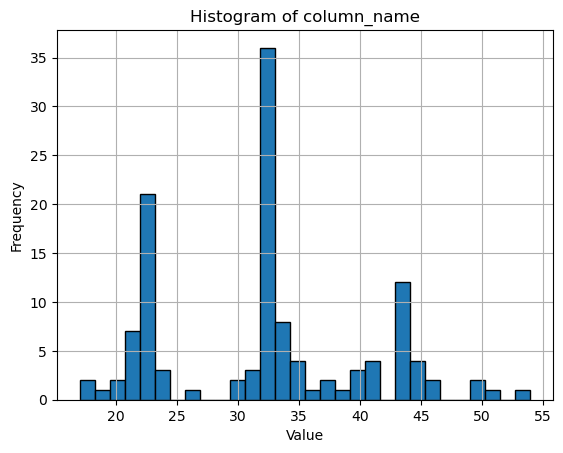

In [274]:
import matplotlib.pyplot as plt

# Create histogram for the column
df_new['Age'].hist(bins=30, edgecolor='black')

# Add title and labels
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


# IQR method of finding outliers

In [275]:
Q1=df_new['Age'].quantile(0.25)
Q3=df_new['Age'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
higher_bound=Q3+1.5*IQR
outlier=df_new[(df_new['Age']<lower_bound) | (df_new['Age']>higher_bound)]
print("Outlier")
print(outlier)

Outlier
Empty DataFrame
Columns: [Company, Age, Salary, Place, Gender]
Index: []


z-scoremethod

outlier removal is not requied because data cleaning was done and data is small

In [276]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  123 non-null    object 
 1   Age      123 non-null    float64
 2   Salary   123 non-null    float64
 3   Place    123 non-null    object 
 4   Gender   123 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.8+ KB


Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


In [277]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

In [278]:
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


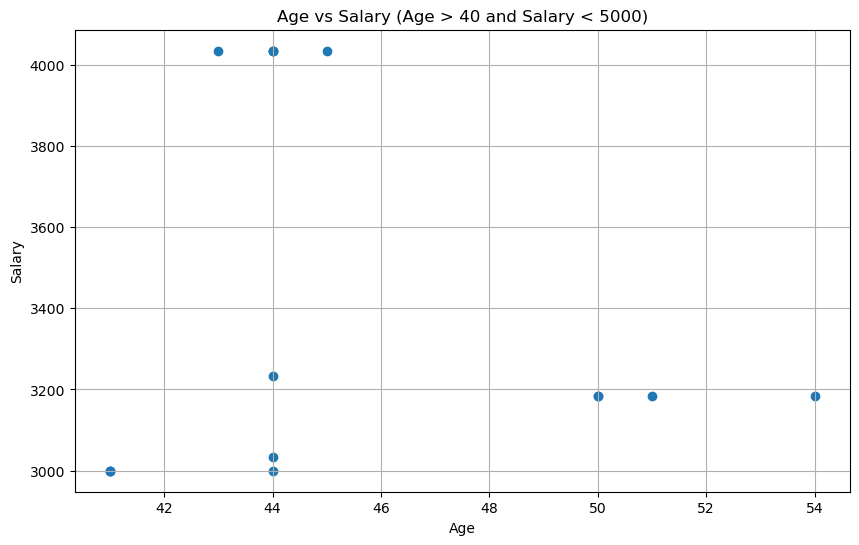

In [279]:
plt.figure(figsize=(10,6))
plt.scatter(filtered_data['Age'],filtered_data['Salary'])
plt.title("Age vs Salary (Age > 40 and Salary < 5000)")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

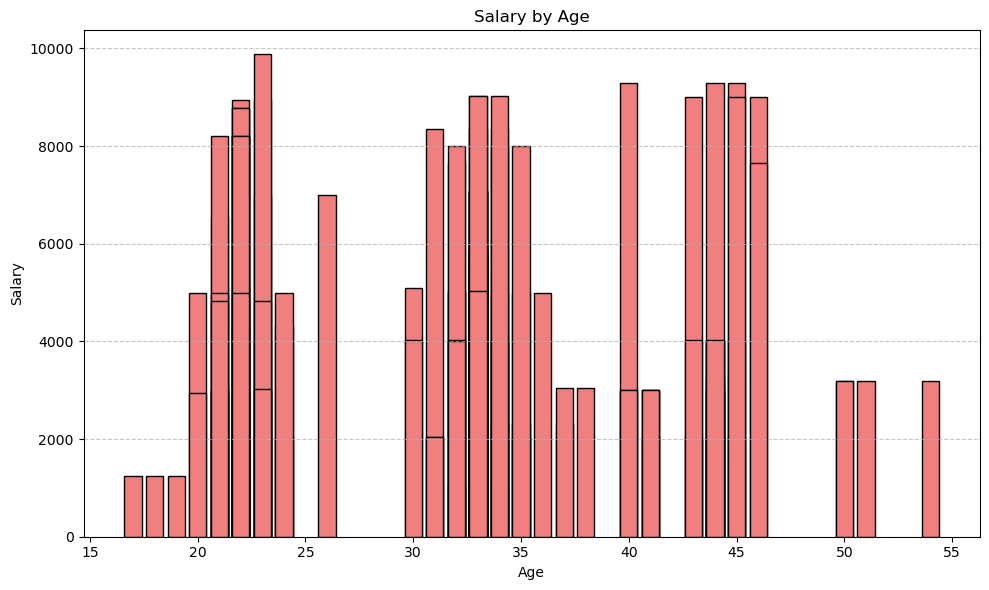

In [280]:

df_sorted = df_new.sort_values(by='Age')
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Age'], df_sorted['Salary'], color='lightcoral', edgecolor='black')
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [281]:
place_counts = df['Place'].value_counts()
print(place_counts)

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


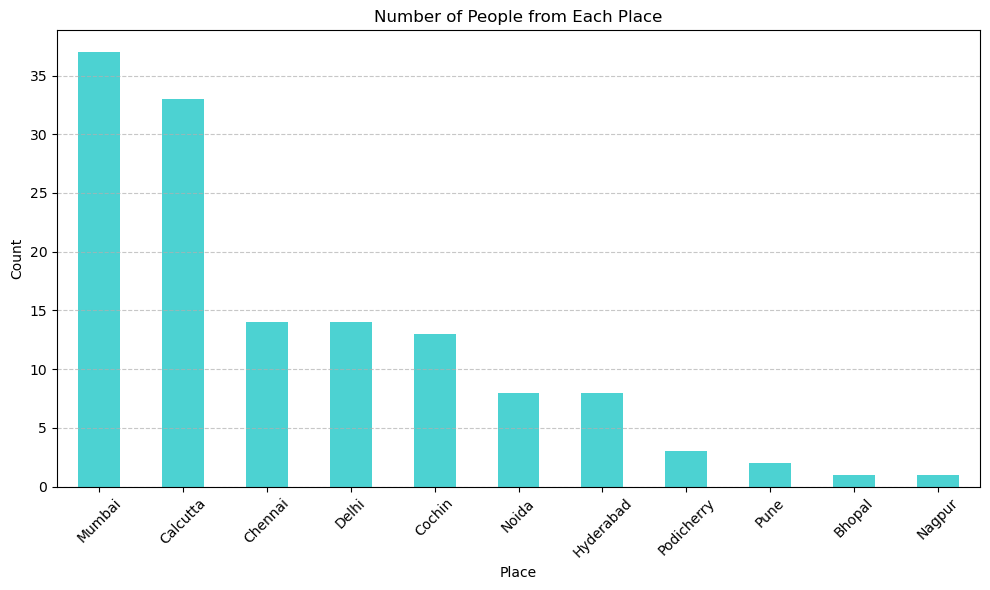

In [282]:
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='c', alpha=0.7)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


one-hot encoding

In [283]:
df_encoded = pd.get_dummies(df, columns=['Company','Place'])

print(df_encoded)

      Age  Salary Country  Gender  Company_CTS  Company_Congnizant  \
0    20.0     NaN   India       0        False               False   
1    30.0     NaN   India       0        False               False   
2    35.0  2300.0   India       0        False               False   
3    40.0  3000.0   India       0        False               False   
4    23.0  4000.0   India       0        False               False   
..    ...     ...     ...     ...          ...                 ...   
143  33.0  9024.0   India       1        False               False   
144  22.0  8787.0   India       1        False               False   
145  44.0  4034.0   India       1        False               False   
146  33.0  5034.0   India       1        False               False   
147  22.0  8202.0   India       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True               

# Label Encoding

In [284]:
from sklearn.preprocessing import LabelEncoder


In [285]:
df_label_encoded=df_new.copy()

In [286]:
le_Company=LabelEncoder()
le_Palce=LabelEncoder()
df_label_encoded['Company']=le_Company.fit_transform(df_label_encoded['Company'])
df_label_encoded['Place']=le_Palce.fit_transform(df_label_encoded['Place'])
print(df_label_encoded)

     Company   Age  Salary  Place  Gender
0          2  20.0  5000.0      2       0
1          1  30.0  4034.0      6       0
2          2  35.0  2300.0      1       0
3          1  40.0  3000.0      4       0
4          2  23.0  4000.0      6       0
..       ...   ...     ...    ...     ...
142        1  22.0  8202.0      6       0
143        2  33.0  9024.0      1       1
145        1  44.0  4034.0      4       1
146        2  33.0  5034.0      6       1
147        1  22.0  8202.0      3       0

[123 rows x 5 columns]


# After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [288]:
from sklearn.preprocessing import StandardScaler

standard_scaler=df_label_encoded.copy()
scaler=StandardScaler()
scaler.fit(standard_scaler)
standard_scaler_df=scaler.transform(standard_scaler)

In [289]:
standard_scaler_df

array([[ 0.7242523 , -1.4676354 ,  0.09676078, -0.79911997, -0.49236596],
       [-1.21233538, -0.28699999, -0.29487714,  0.8122203 , -0.49236596],
       [ 0.7242523 ,  0.30331772, -0.99787938, -1.20195504, -0.49236596],
       [-1.21233538,  0.89363542, -0.71408378,  0.00655016, -0.49236596],
       [ 0.7242523 , -1.11344478, -0.3086615 ,  0.8122203 , -0.49236596],
       [-1.21233538,  0.06719063,  0.09676078, -1.20195504, -0.49236596],
       [ 0.7242523 ,  0.06719063,  0.50218307, -0.79911997,  2.0310096 ],
       [-1.21233538, -1.11344478,  0.90760535,  0.8122203 ,  2.0310096 ],
       [ 0.7242523 ,  0.18525417,  1.31302763, -1.20195504,  2.0310096 ],
       [ 0.7242523 ,  1.48395313,  1.71844991,  0.00655016, -0.49236596],
       [ 0.7242523 , -1.11344478, -1.1057217 ,  0.8122203 , -0.49236596],
       [ 0.7242523 ,  0.18525417, -1.48884576, -1.20195504, -0.49236596],
       [ 0.7242523 ,  1.48395313, -1.1057217 , -0.79911997, -0.49236596],
       [ 0.7242523 , -1.70376248, -1.4

In [290]:
print(len(standard_scaler_df[0]))

5


In [293]:
from sklearn.preprocessing import MinMaxScaler
min_max=df_label_encoded.copy()
min_scaler=MinMaxScaler()
min_scaler.fit(min_max)
min_scaler_df=min_scaler.transform(min_max)

In [294]:
min_scaler_df

array([[1.        , 0.08108108, 0.44508934, 0.2       , 0.        ],
       [0.5       , 0.35135135, 0.33515421, 0.6       , 0.        ],
       [1.        , 0.48648649, 0.13781723, 0.1       , 0.        ],
       [0.5       , 0.62162162, 0.21748037, 0.4       , 0.        ],
       [1.        , 0.16216216, 0.33128485, 0.6       , 0.        ],
       [0.5       , 0.43243243, 0.44508934, 0.1       , 0.        ],
       [1.        , 0.43243243, 0.55889382, 0.2       , 1.        ],
       [0.5       , 0.16216216, 0.6726983 , 0.6       , 1.        ],
       [1.        , 0.45945946, 0.78650279, 0.1       , 1.        ],
       [1.        , 0.75675676, 0.90030727, 0.4       , 0.        ],
       [1.        , 0.16216216, 0.10754524, 0.6       , 0.        ],
       [1.        , 0.45945946, 0.        , 0.1       , 0.        ],
       [1.        , 0.75675676, 0.10754524, 0.2       , 0.        ],
       [1.        , 0.02702703, 0.01650165, 0.6       , 0.        ],
       [0.5       , 0.62162162, 0.

In [296]:
print(len(min_scaler_df[0]))

5
